In [1]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
%matplotlib notebook

import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

from models.bandit_model_comparison import BanditModelComparison
from utils.run_fit_behavior import *

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

The very first attempt: Hattori 2019 wins!

valid trials = 9871
=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 15412.4, BIC = 15426.8 (done in 110 secs)
Model 2/8:     RW1972_epsi, Km = 3 ... AIC = 12567.3, BIC = 12588.9 (done in 59.9 secs)
Model 3/8:     LNP_softmax, Km = 3 ... AIC = 10058.1, BIC = 10079.7 (done in 61.5 secs)
Model 4/8:     LNP_softmax, Km = 5 ... AIC = 10021, BIC = 10057 (done in 121 secs)
Model 5/8:  RW1972_softmax, Km = 3 ... AIC = 12285, BIC = 12306.5 (done in 39.1 secs)
Model 6/8:     Hattori2019, Km = 4 ... AIC = 12250.7, BIC = 12279.4 (done in 42.3 secs)
Model 7/8:        Bari2019, Km = 4 ... AIC = 10082.3, BIC = 10111.1 (done in 120 secs)
Model 8/8:     Hattori2019, Km = 5 ... AIC = 9471.61, BIC = 9507.6 (done in 86.6 secs)


<IPython.core.display.Javascript object>


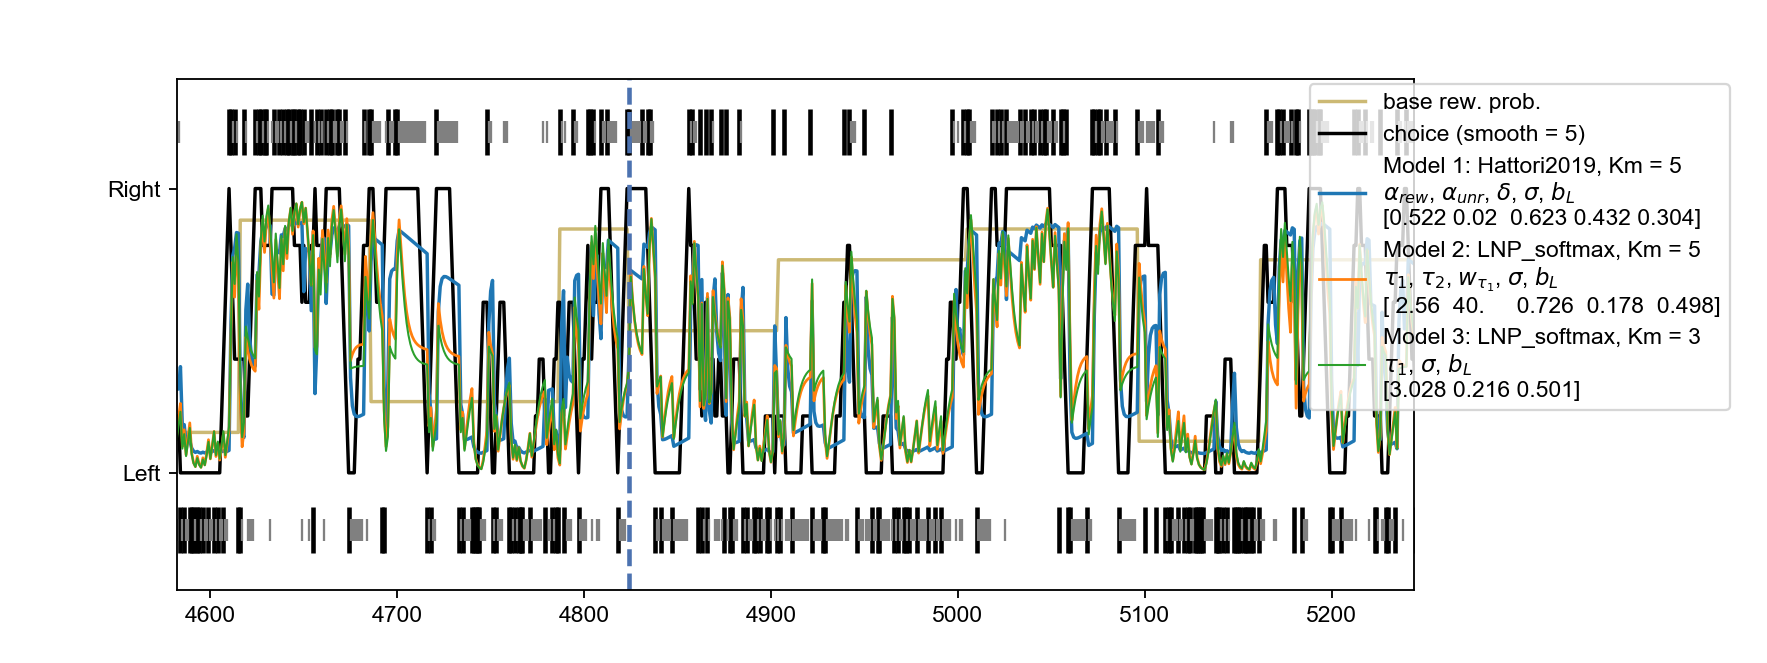

,model,Km,AIC,log10_BF_AIC,model_weight_AIC,BIC,log10_BF_BIC,model_weight_BIC,para_notation,para_fitted
8,Hattori2019,5,9471.61,-0.00,1.0,9507.60,-0.00,1.0,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$","[0.522, 0.02, 0.623, 0.432, 0.304]"
4,LNP_softmax,5,10021.00,-119.30,0.0,10056.98,-119.30,0.0,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$","[2.56, 40.0, 0.726, 0.178, 0.498]"
3,LNP_softmax,3,10058.08,-127.35,0.0,10079.67,-124.22,0.0,"$\tau_1$, $\sigma$, $b_L$","[3.028, 0.216, 0.501]"
7,Bari2019,4,10082.34,-132.62,0.0,10111.13,-131.06,0.0,"$\alpha_{rew}$, $\delta$, $\sigma$, $b_L$","[0.013, 0.272, 0.01, 0.503]"
6,Hattori2019,4,12250.65,-603.46,0.0,12279.44,-601.90,0.0,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$","[0.538, 0.266, 0.616, 0.589]"
5,RW1972_softmax,3,12284.95,-610.91,0.0,12306.54,-607.78,0.0,"$\alpha_{rew}$, $\sigma$, $b_L$","[0.35, 0.521, 0.581]"
2,RW1972_epsi,3,12567.35,-672.23,0.0,12588.94,-669.10,0.0,"$\alpha_{rew}$, $\epsilon$, $b_L$","[0.294, 0.758, 0.164]"
1,LossCounting,2,15412.42,-1290.03,0.0,15426.82,-1285.34,0.0,"$\mu_{LC}$, $\sigma_{LC}$","[13.49, 10.0]"


<IPython.core.display.Javascript object>


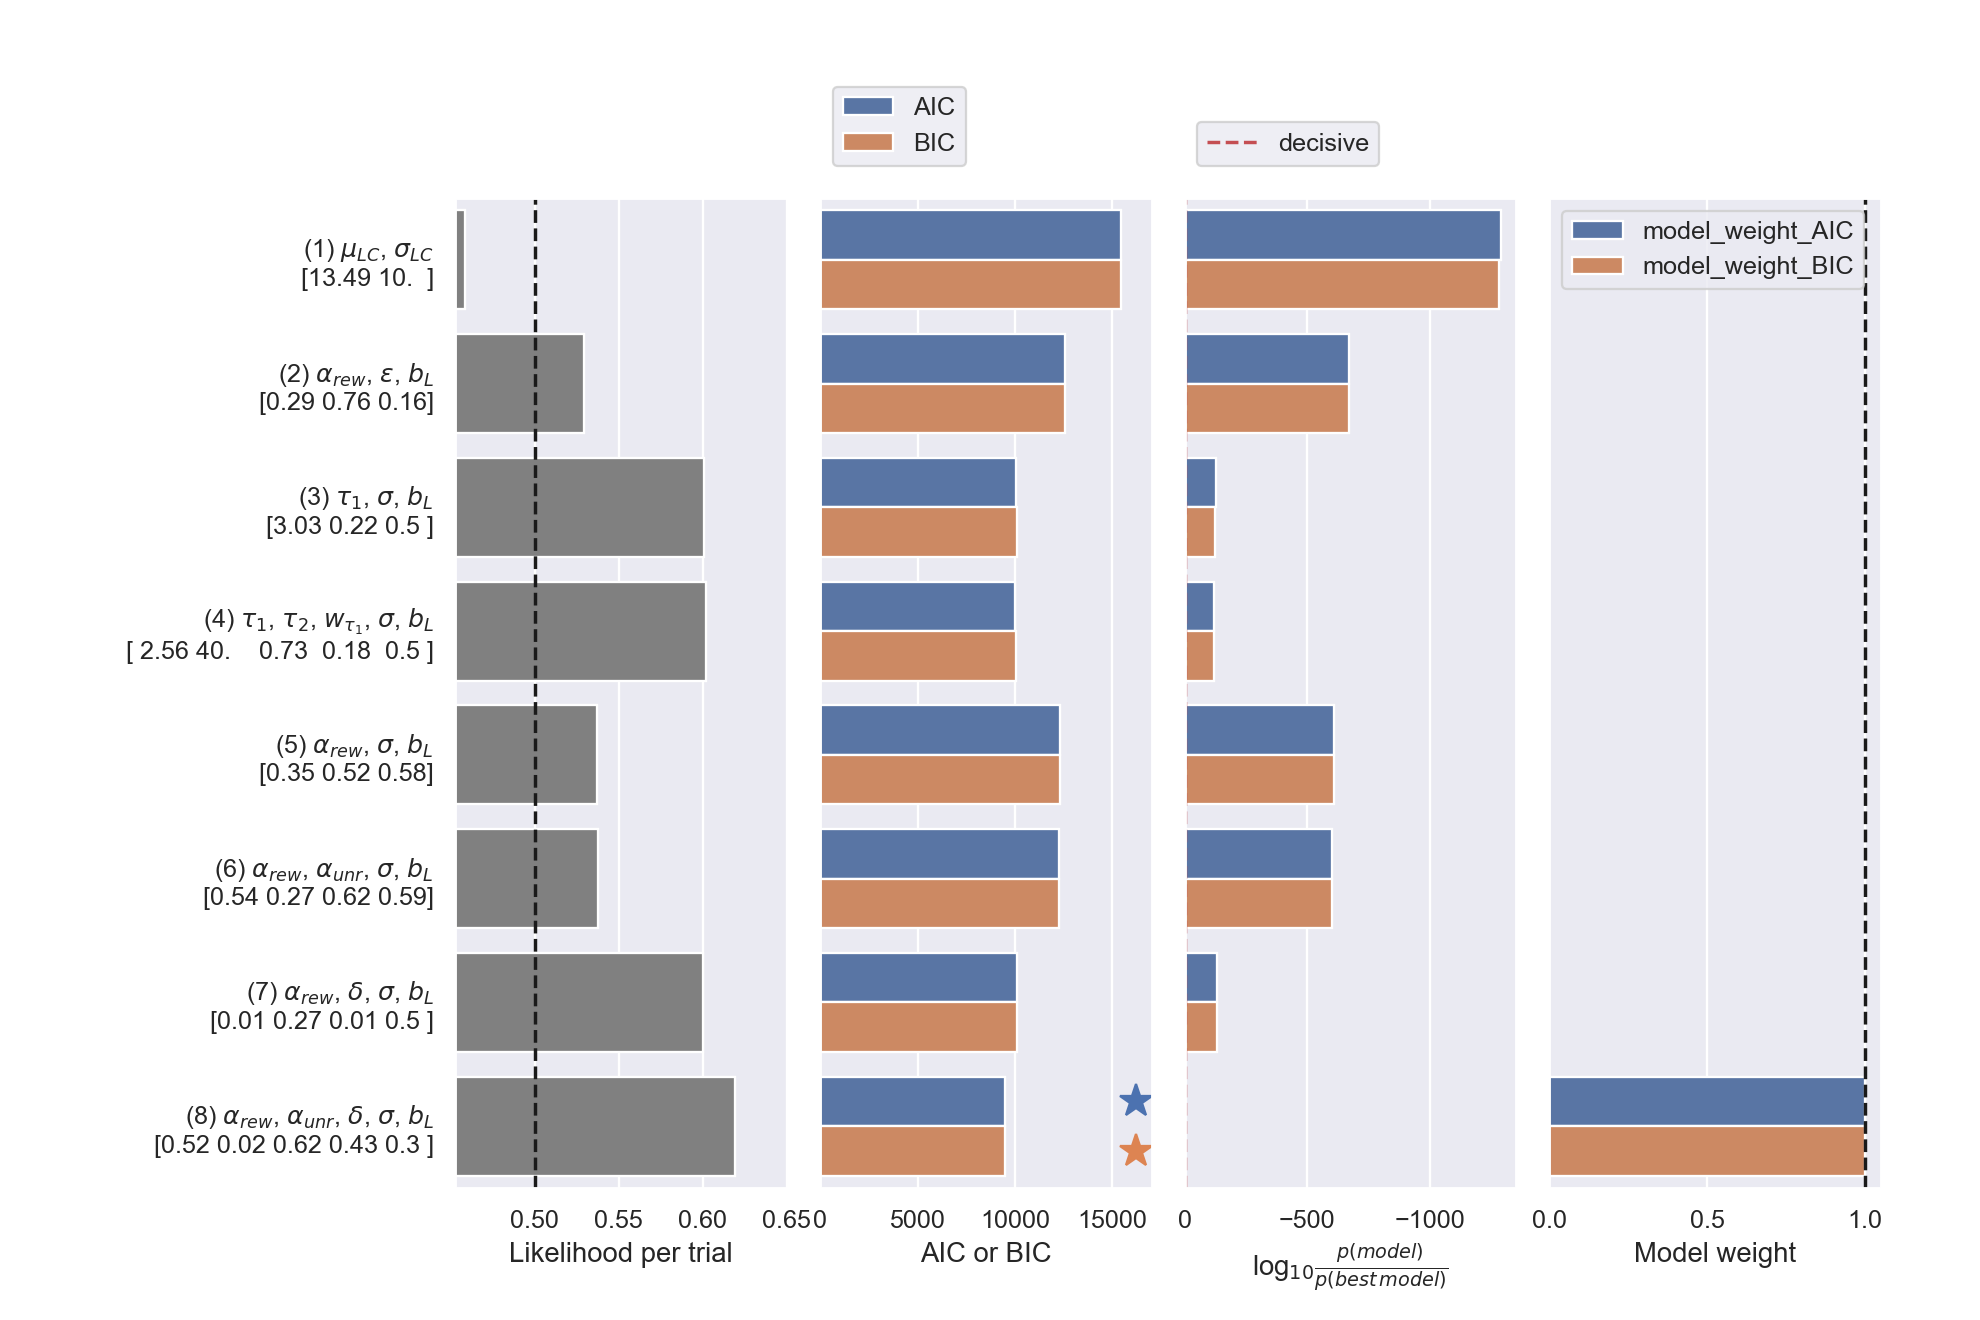

In [2]:
data = np.load("export\\FOR01.npz")
model_comparison = behavior_model_comparison(data, pool = pool, models = [1,9,10,11,12,13,14,15])

13433
=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 19078.3, BIC = 19093.3 (done in 61.7 secs)
Model 2/8:     RW1972_epsi, Km = 3 ... AIC = 17506.2, BIC = 17528.7 (done in 66.5 secs)
Model 3/8:     LNP_softmax, Km = 3 ... AIC = 15109.4, BIC = 15131.9 (done in 89.2 secs)
Model 4/8:     LNP_softmax, Km = 5 ... AIC = 14955.9, BIC = 14993.4 (done in 212 secs)
Model 5/8:  RW1972_softmax, Km = 3 ... AIC = 17195.1, BIC = 17217.6 (done in 44.3 secs)
Model 6/8:     Hattori2019, Km = 4 ... AIC = 17173, BIC = 17203 (done in 51.8 secs)
Model 7/8:        Bari2019, Km = 4 ... AIC = 15129.3, BIC = 15159.3 (done in 125 secs)
Model 8/8:     Hattori2019, Km = 5 ... AIC = 14749.2, BIC = 14786.8 (done in 105 secs)


<IPython.core.display.Javascript object>


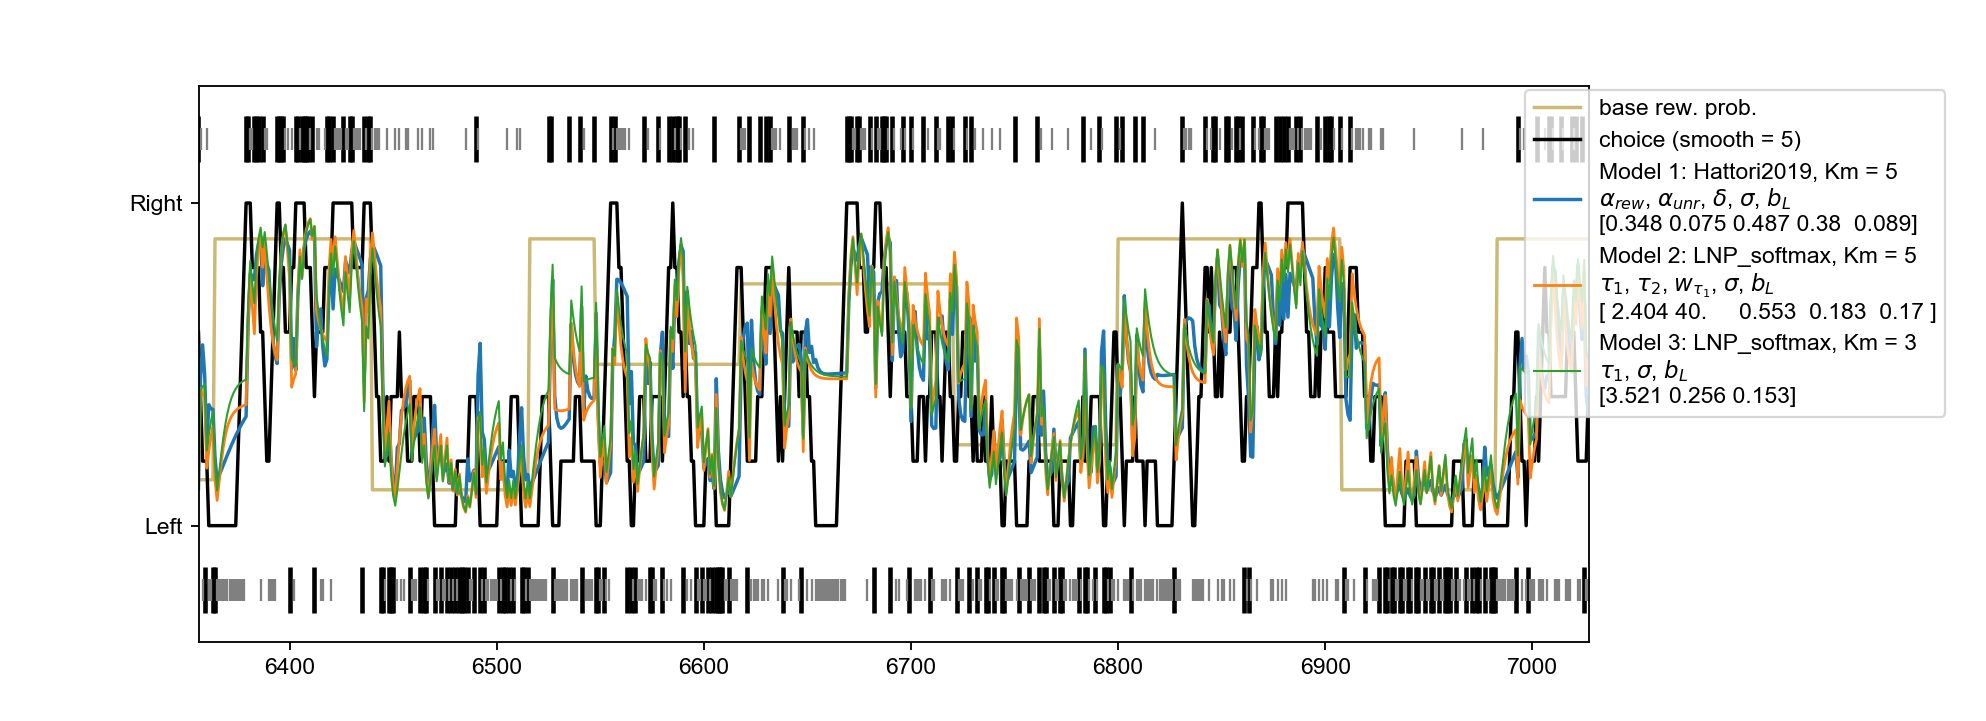

,model,Km,AIC,log10_BF_AIC,BIC,log10_BF_BIC,para_notation,para_fitted
8,Hattori2019,5,14749.24,-0.00,14786.77,-0.00,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$","[0.348, 0.075, 0.487, 0.38, 0.089]"
4,LNP_softmax,5,14955.87,-44.87,14993.40,-44.87,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$","[2.404, 40.0, 0.553, 0.183, 0.17]"
3,LNP_softmax,3,15109.41,-78.21,15131.92,-74.95,"$\tau_1$, $\sigma$, $b_L$","[3.521, 0.256, 0.153]"
7,Bari2019,4,15129.28,-82.52,15159.30,-80.89,"$\alpha_{rew}$, $\delta$, $\sigma$, $b_L$","[0.01, 0.241, 0.01, 0.154]"
6,Hattori2019,4,17173.00,-526.31,17203.02,-524.68,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$","[0.484, 0.299, 0.629, 0.173]"
5,RW1972_softmax,3,17195.13,-531.12,17217.64,-527.86,"$\alpha_{rew}$, $\sigma$, $b_L$","[0.343, 0.543, 0.175]"
2,RW1972_epsi,3,17506.18,-598.66,17528.70,-595.40,"$\alpha_{rew}$, $\epsilon$, $b_L$","[0.306, 0.697, 0.071]"
1,LossCounting,2,19078.30,-940.04,19093.31,-935.15,"$\mu_{LC}$, $\sigma_{LC}$","[9.004, 10.0]"


<IPython.core.display.Javascript object>


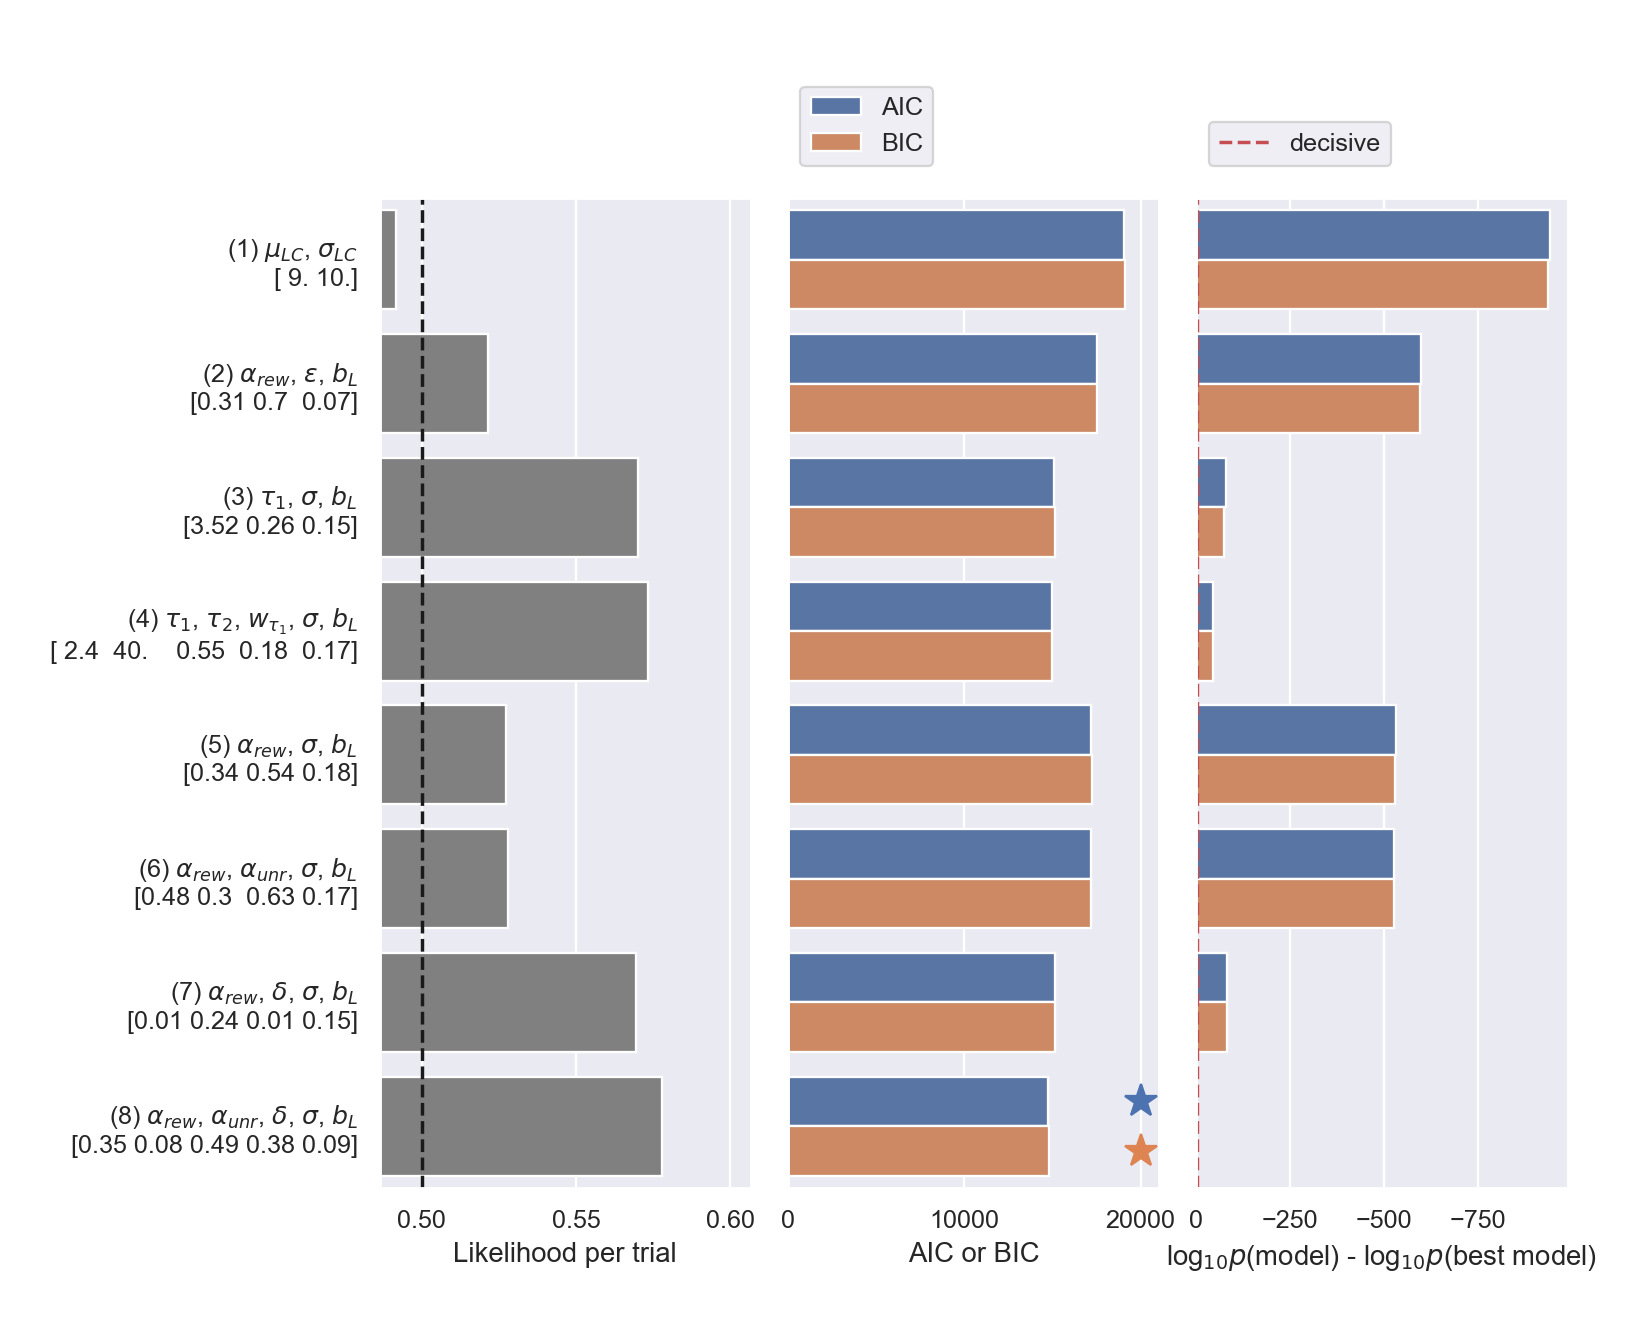

In [19]:
data = np.load("export\\FOR02.npz")
model_comparison = behavior_model_comparison(data, pool = pool, models = [1,9,10,11,12,13,14,15])

In [2]:
fit_all_mice(path = 'export\\', models = [1,9,10,11,12,13,14,15], pool = pool)

=== Mice FOR01.npz ===
Total valid trials = 9871


Session-wise: 100%|██████████| 22/22 [12:05<00:00, 33.00s/it]


Pooling all sessions:  Done in 530.083 secs
Mice FOR01.npz done in 20.9345 mins!

=== Mice FOR02.npz ===
Total valid trials = 13433


Session-wise: 100%|██████████| 23/23 [15:20<00:00, 40.03s/it]


Pooling all sessions:  Done in 690.354 secs
Mice FOR02.npz done in 26.8528 mins!

=== Mice FOR03.npz ===
Total valid trials = 16210


Session-wise: 100%|██████████| 25/25 [18:28<00:00, 44.35s/it]


Pooling all sessions:  Done in 960.515 secs
Mice FOR03.npz done in 34.4884 mins!

=== Mice FOR04.npz ===
Total valid trials = 15392


Session-wise: 100%|██████████| 24/24 [17:59<00:00, 44.96s/it]


Pooling all sessions:  Done in 886.822 secs
Mice FOR04.npz done in 32.7672 mins!

=== Mice FOR05.npz ===
Total valid trials = 21258


Session-wise: 100%|██████████| 50/50 [25:41<00:00, 30.83s/it]


Pooling all sessions:  Done in 1080.53 secs
Mice FOR05.npz done in 43.7005 mins!

=== Mice FOR06.npz ===
Total valid trials = 29360


Session-wise: 100%|██████████| 52/52 [33:39<00:00, 38.84s/it]


Pooling all sessions:  Done in 1777.81 secs
Mice FOR06.npz done in 63.2951 mins!

=== Mice FOR07.npz ===
Total valid trials = 15001


Session-wise: 100%|██████████| 25/25 [18:09<00:00, 43.59s/it]


Pooling all sessions:  Done in 912.123 secs
Mice FOR07.npz done in 33.3659 mins!

=== Mice FOR08.npz ===
Total valid trials = 12446


Session-wise: 100%|██████████| 24/24 [13:04<00:00, 32.68s/it]


Pooling all sessions:  Done in 933.899 secs
Mice FOR08.npz done in 28.6377 mins!

=== Mice FOR09.npz ===
Total valid trials = 13203


Session-wise: 100%|██████████| 26/26 [14:30<00:00, 33.47s/it]


Pooling all sessions:  Done in 786.265 secs
Mice FOR09.npz done in 27.608 mins!

=== Mice FOR10.npz ===
Total valid trials = 12027


Session-wise: 100%|██████████| 24/24 [14:18<00:00, 35.78s/it]


Pooling all sessions:  Done in 629.473 secs
Mice FOR10.npz done in 24.8041 mins!

=== Mice FOR11.npz ===
Total valid trials = 14280


Session-wise: 100%|██████████| 30/30 [17:58<00:00, 35.95s/it]


Pooling all sessions:  Done in 1016.77 secs
Mice FOR11.npz done in 34.9247 mins!

=== Mice FOR12.npz ===
Total valid trials = 13488


Session-wise: 100%|██████████| 30/30 [16:44<00:00, 33.47s/it]


Pooling all sessions:  Done in 727.013 secs
Mice FOR12.npz done in 28.8541 mins!

=== Mice FOR13.npz ===
Total valid trials = 4507


Session-wise: 100%|██████████| 8/8 [05:07<00:00, 38.48s/it]


Pooling all sessions:  Done in 216.068 secs
Mice FOR13.npz done in 8.73305 mins!

=== Mice FOR14.npz ===
Total valid trials = 1385


Session-wise: 100%|██████████| 4/4 [01:36<00:00, 24.02s/it]


Pooling all sessions:  Done in 84.928 secs
Mice FOR14.npz done in 3.01735 mins!

=== Mice HC16.npz ===
Total valid trials = 20694


Session-wise: 100%|██████████| 33/33 [24:14<00:00, 44.09s/it]


Pooling all sessions:  Done in 1098.39 secs
Mice HC16.npz done in 42.5571 mins!


 ALL FINISHED IN 7.57568 hrs!
